Run with /home/levinsj/Fetal_dir/Analysis/sif/pymetaneighbor_version2.sif environment

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pymn

import gseapy

from gseapy import barplot, dotplot

In [2]:
#These save characters as text in PDFs
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#These change plot aesthetics

sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)

Import time associated Genes

In [3]:
fetalNPC = pd.read_csv("/home/levinsj/Fetal_dir/DEG/NPC_fetal_time_dependent_genes.csv", index_col = 'Unnamed: 0')
fetalNPC["names"] = fetalNPC.index

print(fetalNPC)

              baseMean  log2FoldChange     lfcSE       stat        pvalue  \
TMEM258    1881.765000       -0.102556  0.009387 -10.925027  8.751449e-28   
MT-CO1    26583.275000       -0.180015  0.018227  -9.876371  5.270704e-23   
KIAA0101    341.352780       -0.111143  0.011868  -9.364841  7.616499e-21   
IGF2BP1     104.900770       -0.518994  0.069586  -7.458364  8.760356e-14   
CENPV       537.855960       -0.141028  0.020126  -7.007203  2.431290e-12   
...                ...             ...       ...        ...           ...   
CSNK1E      635.898900        0.062728  0.008170   7.677433  1.623085e-14   
ZNF791      218.250810        0.120659  0.015258   7.908066  2.614187e-15   
KCNC2        23.330673        0.498901  0.062867   7.935846  2.090657e-15   
HOXA6       213.256350        0.180537  0.014441  12.502047  7.275344e-36   
APLP2       896.581670        0.089267  0.006914  12.911311  3.886278e-38   

                  padj     names  
TMEM258   4.131559e-24   TMEM258  
MT-CO

Import CellRank genes

In [4]:
CellRankDrivers = pd.read_csv("/home/levinsj/Fetal_dir/Velocyto/03_CellRank/NephroLineageDrivers_self_renew.csv", index_col = 'Unnamed: 0')
CellRankDrivers["names"] = CellRankDrivers.index
print(CellRankDrivers)

       Differentiated Cell_corr  Differentiated Cell_pval  \
ITM2B                  0.215297                       0.0   
PODXL                  0.209503                       0.0   
NPHS2                  0.205876                       0.0   
BCAM                   0.204569                       0.0   
PTPRO                  0.191471                       0.0   
...                         ...                       ...   
NNAT                  -0.392043                       0.0   
RSPO3                 -0.394190                       0.0   
MEIS2                 -0.410213                       0.0   
HMCN1                 -0.422717                       0.0   
NR2F1                 -0.558903                       0.0   

       Differentiated Cell_qval  Differentiated Cell_ci_low  \
ITM2B                       0.0                    0.206066   
PODXL                       0.0                    0.200248   
NPHS2                       0.0                    0.196607   
BCAM           

In [5]:
merged_df = pd.merge(fetalNPC, CellRankDrivers, how='inner', left_index=True, right_index=True)
print(merged_df)

merged_df["TimeDependent_log10"] = -np.log10(merged_df["padj"])
merged_df["CellRank_log10"] = -np.log10(merged_df["NPC_qval"])

            baseMean  log2FoldChange     lfcSE       stat        pvalue  \
TMEM258  1881.765000       -0.102556  0.009387 -10.925027  8.751449e-28   
IGF2BP1   104.900770       -0.518994  0.069586  -7.458364  8.760356e-14   
CENPV     537.855960       -0.141028  0.020126  -7.007203  2.431290e-12   
GFRA1     311.491520       -0.141059  0.021852  -6.455057  1.081784e-10   
ANP32A    913.056300       -0.048030  0.007521  -6.386081  1.701908e-10   
...              ...             ...       ...        ...           ...   
PDLIM5    126.110700        0.139869  0.018540   7.544117  4.553610e-14   
CSNK1E    635.898900        0.062728  0.008170   7.677433  1.623085e-14   
ZNF791    218.250810        0.120659  0.015258   7.908066  2.614187e-15   
KCNC2      23.330673        0.498901  0.062867   7.935846  2.090657e-15   
APLP2     896.581670        0.089267  0.006914  12.911311  3.886278e-38   

                 padj  names_x  Differentiated Cell_corr  \
TMEM258  4.131559e-24  TMEM258         

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
signif = merged_df.NPC_qval <= 0.05
renew = merged_df.NPC_corr > 0
dif = merged_df.NPC_corr < 0

merged_df['renew'] = np.where((signif & renew), 1, 0)
merged_df['dif'] = np.where((signif & dif), 1, 0)

merged_df.to_csv("/home/levinsj/Fetal_dir/DEG/NPC_fetal_time_dependent_genes_with_Renew.csv")

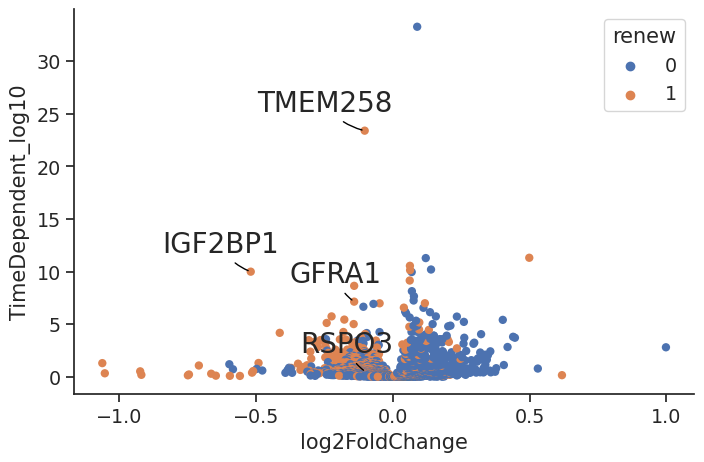

In [7]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x="log2FoldChange", y="TimeDependent_log10",hue = "renew",  data=merged_df, linewidth=0)

genes_to_label = ["SIX2", "IGF2BP1", "RSPO3", "GFRA1","HIST1H4C","TMEM258"]

filtered_df = merged_df[merged_df.index.isin(genes_to_label)]

for i, row in filtered_df.iterrows():
    plt.annotate(row.name,
                 xy=(row['log2FoldChange'], row['TimeDependent_log10']),
                 xytext=(20, 20),  # Adjust offset as needed
                 textcoords='offset points', fontsize = 20,
                 arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.2", color = "black"),
                 ha='right', va='center')
    
plt.show()

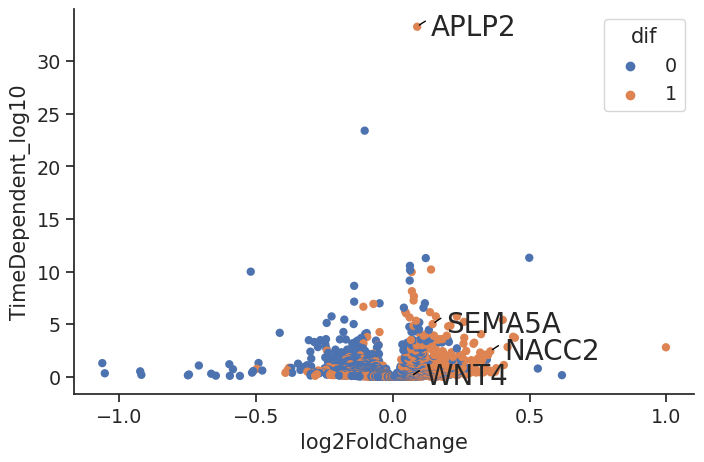

In [8]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x="log2FoldChange", y="TimeDependent_log10",hue = "dif",  data=merged_df, linewidth=0)

genes_to_label = ["CA7", "MR1", "WNT4", "NACC2", "SEMA5A", "APLP2","FABP4"]

# Filter for the desired indices/genes
filtered_df = merged_df[merged_df.index.isin(genes_to_label)]

# Annotate points with indices/gene names
for i, row in filtered_df.iterrows():
    plt.annotate(row.name,
                 xy=(row['log2FoldChange'], row['TimeDependent_log10']),
                 xytext=(10, 10),  # Adjust offset as needed
                 textcoords='offset points', fontsize = 20,
                 arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.4", color = "black"),
                 ha='left', va='top')
    
plt.show()

In [9]:
human = gseapy.get_library_name(organism='Human')

v_library='WikiPathway_2023_Human' ## 'WikiPathway_2023_Human' ###  
gset = gseapy.parser.get_library(v_library, min_size=5)


In [10]:
min_size = 30
max_size = 100

cellRank = merged_df
cellRank["names"]= cellRank["names_x"]

cellRank["pi_score"] = -1 * np.log10(cellRank["NPC_corr"]) * cellRank["NPC_qval"]
cellRank.dropna(inplace=True)

gene_rank = cellRank[['names','pi_score']]
gene_rank.sort_values(by=['pi_score'], inplace=True, ascending=False)
gene_rank = gene_rank.reset_index(drop=True)

res = gseapy.prerank(rnk=gene_rank, gene_sets=gset, 
                    min_size=min_size,
                    max_size=max_size,
                    permutation_num=1000, # reduce number to speed up testing
                    outdir=None, # don't write to disk
                    seed=6,
                    verbose=True,)

res.res2d.sort_values(by=['FDR q-val'], inplace=True, ascending=True)
res.res2d.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_109402/1584690534.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_rank.sort_values(by=['pi_score'], inplace=True, ascending=False)
2024-10-11 15:11:46,259 [WARNING] Duplicated values found in preranked stats: 1.59% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-10-11 15:11:46,264 [INFO] Parsing data files for GSEA.............................
2024-10-11 15:11:46,274 [INFO] 0718 gene_sets have been filtered out when max_size=100 and min_size=30
2024-10-11 15:11:46,276 [INFO] 0069 gene_sets used for further statistical testing.....
2024-10-11 15:11:46,277 [INFO]

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
68,prerank,Nucleotide Excision Repair In Xeroderma Pigmen...,0.624185,0.874365,0.984,0.993101,1.0,11/34,33.41%,GTF2H1;USP7;SLX4IP;LIG3;CDK7;PCNA;CUL4A;XPC;PO...
67,prerank,Gastrin Signaling Pathway WP4659,0.635077,0.891931,0.984,0.998029,1.0,15/36,32.44%,EIF4EBP1;EGFR;PIK3R2;BIRC5;GRB2;IKBKB;RPS6KB1;...
65,prerank,Hippo Signaling Regulation Pathways WP4540,0.639132,0.896742,0.97,1.0,1.0,8/36,31.45%,PRKAR1B;PRKCZ;EGFR;PLCB4;PRKACB;GNAL;KIT;PDGFRA
36,prerank,Alzheimer 39 S Disease WP5124,0.674503,0.960545,0.849,1.0,1.0,20/69,29.02%,IDE;PPP3CB;BID;VDAC3;PSEN1;PSMC3;PPP3R1;PIK3C3...
37,prerank,Alzheimer 39 S Disease And miRNA Effects WP2059,0.674503,0.960545,0.849,1.0,1.0,20/69,29.02%,IDE;PPP3CB;BID;VDAC3;PSEN1;PSMC3;PPP3R1;PIK3C3...
38,prerank,Ciliary Landscape WP4352,0.669169,0.960099,0.867,1.0,1.0,20/91,25.30%,POM121;XPNPEP3;LSM4;ARL8B;RANBP10;TTC8;COPS5;B...
39,prerank,Sudden Infant Death Syndrome SIDS Susceptibili...,0.68605,0.959396,0.764,1.0,1.0,4/34,23.73%,PRKAR1B;HADHA;PRKACB;EP300
40,prerank,Epithelial To Mesenchymal Transition In Colore...,0.684251,0.958727,0.75,1.0,1.0,7/34,29.74%,TRAF6;PIK3R2;GRB2;TP53;PIK3R1;GSK3B;SUZ12
41,prerank,IL 24 Signaling Pathway WP5413,0.672598,0.955598,0.844,1.0,1.0,26/53,29.02%,BCL6;EIF4EBP1;PTEN;ATM;PROM1;EGFR;CENPA;EIF4E;...
42,prerank,MAPK Signaling Pathway WP382,0.67403,0.954328,0.84,1.0,1.0,14/56,21.95%,NFATC3;PAK2;NF1;TRAF6;PPP3CB;EGFR;TAOK1;FGF13;...
